In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
dict_img_position = {
    'main':[0, 200],
    'ht':[200, 650],
    'loss':[650, 920],
    'overall_results':[930, 1150]}

In [5]:
from modules.summarizing_utils.common_filter_results_methods import get_img_list
from modules.summarizing_utils.filter_results_utils import get_available_attr
from modules.summarizing_utils.filter_results_utils import filter_results

from modules.summarizing_utils.save_imgs import save_imgs2pdf
from modules.summarizing_utils.sorting_methods import sort_by_attr_values

from modules.summarizing_utils.heatmaps import get_override_dict_list
from modules.summarizing_utils.heatmaps import quantitative_results_HEATMAPS

## Obtain attribute dictionary

In [6]:
import glob

In [7]:
modes = ['L1Loss', 'MSE', 'SSIM', 'SSIM11', 'SSIM5', 'last_converged']
interested_modes = ['L1Loss', 'MSE', 'SSIM5', 'SSIM11']

#exp_set_dir = 'figs/confocalv2'
#exp_set_dir = '/n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv29'
exp_set_dir = '/n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28'

for dir_ in glob.glob(f'{exp_set_dir}/*'):
    if dir_.split('/')[-1]=='heatmaps' or dir_.split('/')[-1]=='_results_summaries':continue
    for img_dir in glob.glob(f'{dir_}/*.jpg'):
        if '150_' in img_dir:break
    else:
        print(f'Incompleted exp : {dir_}')
else:
    print('All exps are completed')
print('\n\n')

mode= interested_modes[0]
img_list = get_img_list(img_dir = exp_set_dir, mode=mode)
print('img_list length : ', len(img_list))
dict_ = get_available_attr(img_list)
interested_imgs = filter_results(img_list, dict_)
print(f'available keys : {list(dict_img_position.keys())}')

dict_

Incompleted exp : /n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/errors.txt
All exps are completed



1/168 : /n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/rotation_lambda(10.0)@lambda_scale_factor(1)@T(1)@lr_H(0.0)@img_size(256)@num_samples_train(3000)/150_L1Loss(0.0401951)_MSE(0.0114684)_SSIM11(0.8316282)_SSIM5(0.8137288).jpg
101/168 : /n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/rotation_lambda(10000.0)@lambda_scale_factor(2)@T(2)@lr_H(0.0)@img_size(256)@num_samples_train(3000)/150_L1Loss(0.0150136)_MSE(0.0012904)_SSIM11(0.9385853)_SSIM5(0.9106139).jpg
len img dirs : 168
img_list length :  168
168 images are found !!!
available keys : ['main', 'ht', 'loss', 'overall_results']


{'rotation_lambda': ['10.0', '10000.0'],
 'lambda_scale_factor': ['1', '2', '3', '4', '5', '6', '7'],
 'T': ['1', '16', '2', '32', '4', '8'],
 'lr_H': ['0.0', '1.0'],
 'img_size': ['256'],
 'num_samples_train': ['3000']}

## Save qualitative results and Quantitative results (HEATMAPS) to PDF

In [8]:
def save_HEATMAPS(mode, img_list, exp_set_dir= None): ## CHANGE THIS 
    print(mode)    
    plot_vars_dict ={
                     'T': ['1', '2', '4', '8', '16', '32'], 
                     'lambda_scale_factor': ['1', '2', '3', '4', '5', '6', '7']
    }

    all_overrides_dict = {'rotation_lambda': ['10.0', '10000.0'],
                          'img_size': ['256'],
                          'num_samples_train': ['3000']}
    
    plot_label_dict= None #skip notation: 'SKIPZE100S1' if needed
     

    low_lr_H, high_lr_H= '0.0', '1.0'

    '''
    plot_vars_dict = {
         'interested_attr1': ['name11', 'name12'],
         'interested_attr2': ['name21', 'name22']}
    
    all_overrides_dict = {'attr1': ['val11', 'val12'],
                          'attr2': ['val21', 'val22'] }
    
    plot_label_dict= {'interested_attr1': ['name11', 'name12'],
                 'interested_attr2': ['name21', 'name22']}
    '''
    
    overrides_dict_list = get_override_dict_list(all_overrides_dict) ## obtain all combinations of override dicts
    quantitative_results_HEATMAPS(img_list, plot_vars_dict, overrides_dict_list, mode, save_dir = exp_set_dir, low_lr_H= low_lr_H, high_lr_H= high_lr_H, show_interested_img_names= False, plot_label_dict= plot_label_dict)

1/168 : /n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/rotation_lambda(10.0)@lambda_scale_factor(1)@T(1)@lr_H(0.0)@img_size(256)@num_samples_train(3000)/150_L1Loss(0.0401951)_MSE(0.0114684)_SSIM11(0.8316282)_SSIM5(0.8137288).jpg
101/168 : /n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/rotation_lambda(10000.0)@lambda_scale_factor(2)@T(2)@lr_H(0.0)@img_size(256)@num_samples_train(3000)/150_L1Loss(0.0150136)_MSE(0.0012904)_SSIM11(0.9385853)_SSIM5(0.9106139).jpg
len img dirs : 168
img_list length :  168
168 images are found !!!
available keys : ['main', 'ht', 'loss', 'overall_results']
qualitative results saved : /n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/_results_summaries/results_MSE_mnistv28.pdf
MSE
attr_dict_highlrH : {'T': ['1', '2', '4', '8', '16', '32'], 'lambda_scale_factor': ['1', '2', '3', '4', '5', '6', '7'], 'lr_H': ['1.0']}
attr_dict_lowlrH : {'T': ['1', '2', '4', '8', '16', '32'], 'lambda_scale_factor': ['1', 

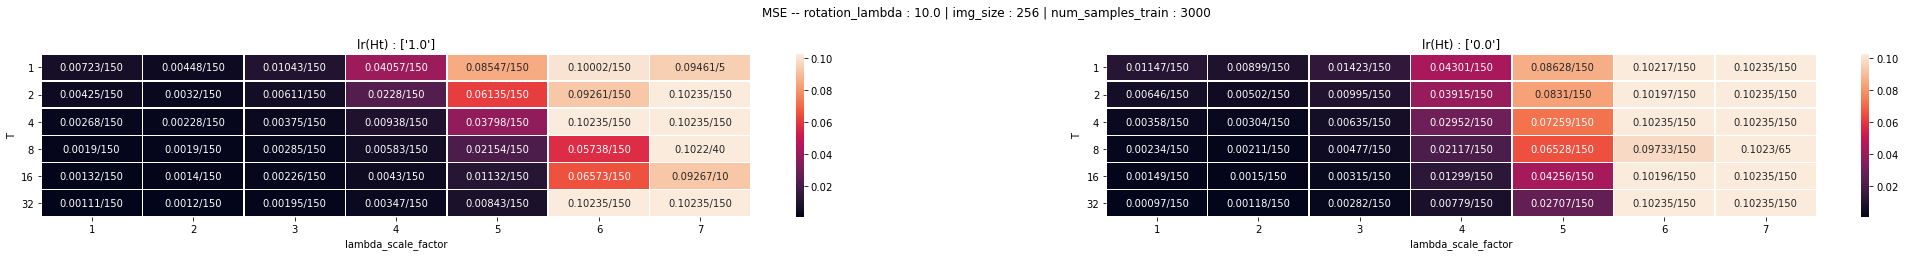

override dict : {'rotation_lambda': '10000.0', 'img_size': '256', 'num_samples_train': '3000'}
42 images are found !!!
42 images are found !!!
******************* WARNING !!! :: m_inc_method :: inc_m_class(epoch_threshold= 80, epoch_steps= 10) is assumed !!! ********************


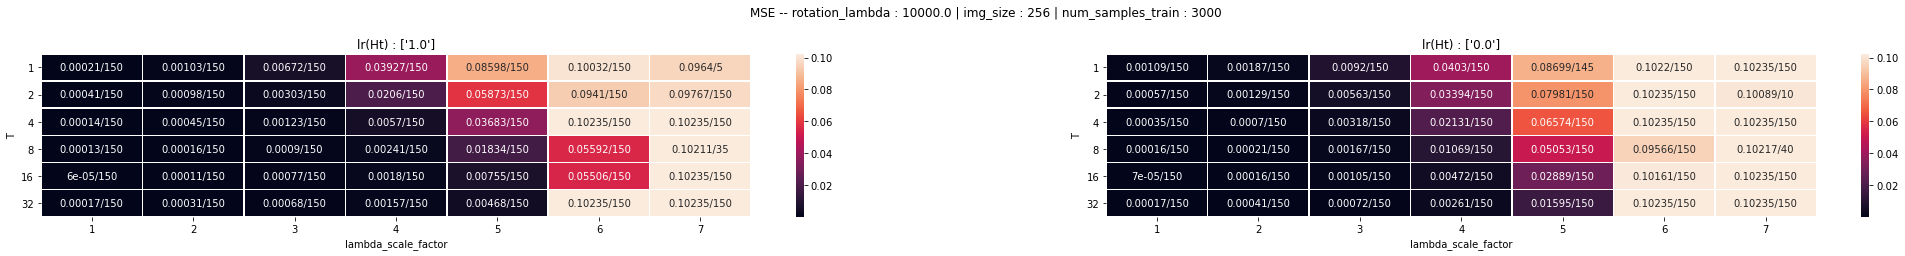

ploting heatmaps finished !!!
quantitative results saved : /n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/heatmaps/heatmaps_mnistv28.pdf
1/168 : /n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/rotation_lambda(10.0)@lambda_scale_factor(1)@T(1)@lr_H(0.0)@img_size(256)@num_samples_train(3000)/150_L1Loss(0.0401951)_MSE(0.0114684)_SSIM11(0.8316282)_SSIM5(0.8137288).jpg
101/168 : /n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/rotation_lambda(10000.0)@lambda_scale_factor(2)@T(2)@lr_H(0.0)@img_size(256)@num_samples_train(3000)/75_L1Loss(0.0144984)_MSE(0.0011424)_SSIM11(0.9415581)_SSIM5(0.9143983).jpg
len img dirs : 168
img_list length :  168
168 images are found !!!
available keys : ['main', 'ht', 'loss', 'overall_results']
qualitative results saved : /n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/_results_summaries/results_SSIM11_mnistv28.pdf
SSIM11
attr_dict_highlrH : {'T': ['1', '2', '4', '8', '16', '32'], 'l

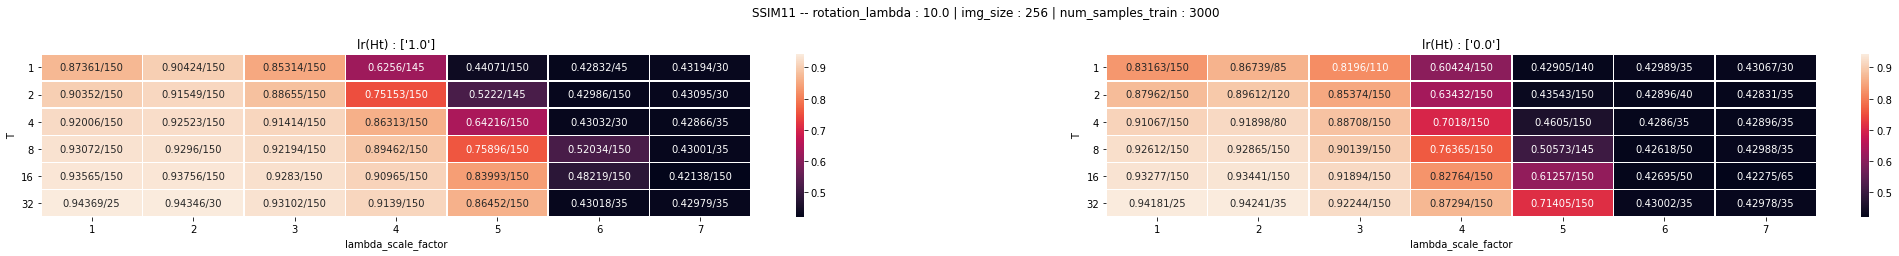

override dict : {'rotation_lambda': '10000.0', 'img_size': '256', 'num_samples_train': '3000'}
42 images are found !!!
42 images are found !!!
******************* WARNING !!! :: m_inc_method :: inc_m_class(epoch_threshold= 80, epoch_steps= 10) is assumed !!! ********************


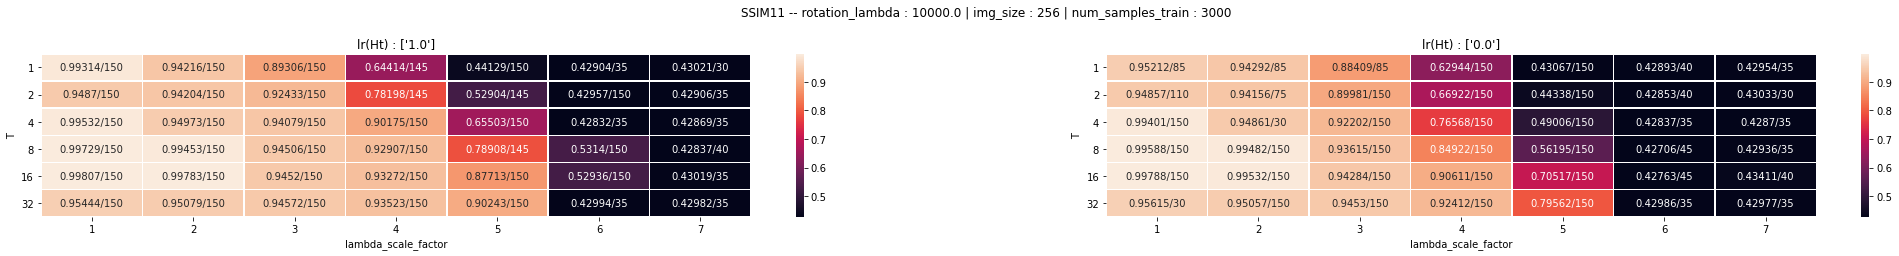

ploting heatmaps finished !!!
quantitative results saved : /n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/heatmaps/heatmaps_mnistv28.pdf


In [9]:
import shutil, os

try:shutil.rmtree(f'{exp_set_dir}/_results_summaries')
except:pass

try:shutil.rmtree(f'{exp_set_dir}/heatmaps')
except:pass

os.mkdir(f'{exp_set_dir}/_results_summaries')

for mode in ['MSE', 'SSIM11']:#, 'last_converged_MSE']:#interested_modes:
    img_list = get_img_list(img_dir = exp_set_dir, mode=mode)
    print('img_list length : ', len(img_list))

    dict_ = get_available_attr(img_list)
    interested_imgs = filter_results(img_list, dict_)
    print(f'available keys : {list(dict_img_position.keys())}')

    #show_results('main', dict_img_position, interested_imgs,  sort_by_attr_values)
    #show_results('loss', dict_img_position, interested_imgs,  sort_by_attr_values)
    #show_results('ht', dict_img_position, interested_imgs,  sort_by_attr_values)
    #show_results('overall_results', dict_img_position, interested_imgs,  sort_by_attr_values)

    exp_set_dir_name= exp_set_dir.split('/')[-1]
    img_pdf_filename = f'{exp_set_dir}/_results_summaries/results_{mode}_{exp_set_dir_name}.pdf'
    save_imgs2pdf(interested_imgs, sorting_function= sort_by_attr_values, pdf_filename=img_pdf_filename, attr_dict= dict_)
    print(f'qualitative results saved : {img_pdf_filename}')
    
    ## ABOVE attr_dict_highlrH, attr_dict_lowlrH -> ONLY CONTAIN KEYS: lr_H, interested_key1, interested_key2 || Other keys -> goes into override dicts !!!


    save_HEATMAPS(mode, img_list, exp_set_dir)

## Get specific heatmaps

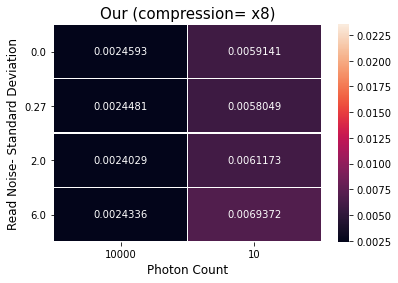

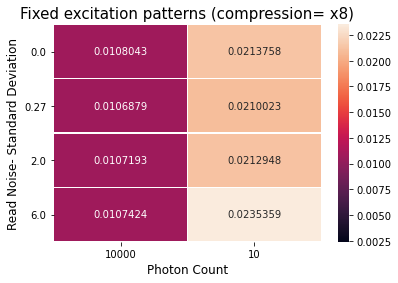

In [11]:
import numpy as np
exp_set_dir = '/n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv29'

high10 = np.load(f'{exp_set_dir}/heatmaps/MSE@@rotation_lambda(10.0)@sPSF(impulse(side_len=5))@exPSF(impulse(side_len=5))@@highlrH.npy')[:,1:]
low10 = np.load(f'{exp_set_dir}/heatmaps/MSE@@rotation_lambda(10.0)@sPSF(impulse(side_len=5))@exPSF(impulse(side_len=5))@@lowlrH.npy')[:,1:]


high10000 = np.load(f'{exp_set_dir}/heatmaps/MSE@@rotation_lambda(10000.0)@sPSF(impulse(side_len=5))@exPSF(impulse(side_len=5))@@highlrH.npy')[:,1:]
low10000 = np.load(f'{exp_set_dir}/heatmaps/MSE@@rotation_lambda(10000.0)@sPSF(impulse(side_len=5))@exPSF(impulse(side_len=5))@@lowlrH.npy')[:,1:]

high= np.concatenate((high10000, high10), axis=1)
low= np.concatenate((low10000, low10), axis=1)

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(high, linewidth=0.5, annot=high, vmin=min(high.min(), low.min()), vmax= max(high.max(), low.max()), fmt= "")

x_ticks = ['0.0', '0.27', '2.0', '6.0']
y_ticks = ['10000', '10']
plt.xticks(np.arange(len(y_ticks))+0.5, y_ticks, rotation=0)
plt.xlabel('Photon Count', fontsize= 12)
plt.yticks(np.arange(len(x_ticks))+0.5, x_ticks, rotation=0)
plt.ylabel('Read Noise- Standard Deviation', fontsize= 12)
plt.title(f'Our (compression= x8)', fontsize= 15)
plt.savefig('noise_learned.pdf')
plt.show()

ax = sns.heatmap(low, linewidth=0.5, annot=low, vmin=min(high.min(), low.min()), vmax= max(high.max(), low.max()), fmt= "")

x_ticks = ['0.0', '0.27', '2.0', '6.0']
y_ticks = ['10000', '10']
plt.xticks(np.arange(len(y_ticks))+0.5, y_ticks, rotation=0)
plt.xlabel('Photon Count', fontsize= 12)
plt.yticks(np.arange(len(x_ticks))+0.5, x_ticks, rotation=0)
plt.ylabel('Read Noise- Standard Deviation', fontsize= 12)
plt.title(f'Fixed excitation patterns (compression= x8)', fontsize= 15)
plt.savefig('noise_nolearned.pdf')
plt.show()


## Convert HEATMAP values to MATLAB format

In [54]:
a[0,1] = 'PQ'
a

array([['W', 'P'],
       ['1', '1']], dtype='<U1')

In [ ]:
#exp_set_dir = 'figs/mnistv13'

print('exp_set_dir :',exp_set_dir) 
heatmap_zipped_dir = './heatmaps_mat_files.zip' #f'{exp_set_dir}/heatmaps/heatmaps_mat_files.zip'

In [ ]:
!rm -rf ./test
!rm $heatmap_zipped_dir

In [ ]:
#%%capture
from modules.summarizing_utils.numpy2mat import zip_heatmap_vals_matlab
zip_heatmap_vals_matlab(exp_set_dir=exp_set_dir, target_dir = heatmap_zipped_dir)

In [ ]:
%%capture
!mkdir ./test
!unzip $heatmap_zipped_dir -d ./test

In [ ]:
!ls ./test

In [ ]:
import os 
len(os.listdir('./test'))

In [ ]:
!rm -rf ./test
!rm $heatmap_zipped_dir